<a href="https://colab.research.google.com/github/tanyakuznetsova/World-Happiness-Report-2023-in-Europe/blob/main/World_Happiness_Report_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries and reading in the dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tanyakuznetsova/World-Happiness-Report-2023-in-Europe/main/WHR2023.csv')

Brief view of the data:


In [ ]:
df.head(10)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
5,Sweden,7.395,0.037,7.468,7.322,10.883,0.939,72.150,0.948,0.165,0.202,1.778,1.921,1.510,0.562,0.754,0.225,0.520,1.903
6,Norway,7.315,0.044,7.402,7.229,11.088,0.943,71.500,0.947,0.141,0.283,1.778,1.994,1.521,0.544,0.752,0.212,0.463,1.829
7,Switzerland,7.240,0.043,7.324,7.156,11.164,0.920,72.900,0.891,0.027,0.266,1.778,2.022,1.463,0.582,0.678,0.151,0.475,1.870
8,Luxembourg,7.228,0.069,7.363,7.093,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,1.357,0.549,0.710,0.149,0.418,1.845
9,New Zealand,7.123,0.038,7.198,7.048,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,1.544,0.513,0.672,0.230,0.471,1.852


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

Unfortunately, there is no information regarding the world region present in the dataset, which is a useful feature. I am going to add it back in from an older World Happiness Report from 2016:

In [ ]:
df_2016 = pd.read_csv('https://raw.githubusercontent.com/tanyakuznetsova/World-Happiness-Report-2023-in-Europe/main/WHR2016.csv')
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
# renaming the column 'Country Name' to just 'Country' to match
df.rename(columns={'Country name': 'Country'}, inplace = True)
#df.head()

In [ ]:
region_data = df_2016[['Country', 'Region']]
df = df.merge(region_data, how = 'left', on = 'Country')

#by default, the Region column will be added as the last column, so let's move it to right after the Country
region_col = df.pop('Region')
df.insert(1, 'Region', region_col)
df.head()

,Country,Region,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,Western Europe,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,Western Europe,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,Middle East and Northern Africa,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,Western Europe,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


The dataset looks clean but there were a couple of null values. Let's take a look and decide what to do with them:

In [ ]:
df[df.isnull().any(axis = 1)]

,Country,Region,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
17,Czechia,NaN,6.845,0.044,6.931,6.759,10.611,0.953,69.050,0.903,0.040,0.859,1.778,1.823,1.544,0.477,0.693,0.158,0.050,2.099
26,Taiwan Province of China,NaN,6.535,0.047,6.627,6.444,10.797,0.884,69.600,0.804,-0.129,0.681,1.778,1.890,1.372,0.492,0.562,0.067,0.178,1.974
81,Hong Kong S.A.R. of China,NaN,5.308,0.048,5.403,5.214,10.966,0.817,77.280,0.687,-0.026,0.385,1.778,1.951,1.201,0.702,0.407,0.123,0.390,0.535
86,North Macedonia,NaN,5.254,0.055,5.361,5.146,9.703,0.805,66.500,0.769,0.131,0.902,1.778,1.498,1.171,0.408,0.515,0.207,0.020,1.435
96,Mozambique,NaN,4.954,0.116,5.181,4.727,7.116,0.692,51.530,0.851,0.047,0.660,1.778,0.570,0.885,0.000,0.625,0.161,0.192,2.519
98,State of Palestine,NaN,4.908,0.092,5.089,4.727,8.716,0.859,NaN,0.694,-0.132,0.836,1.778,1.144,1.309,NaN,0.416,0.065,0.067,NaN
105,Turkiye,NaN,4.614,0.083,4.777,4.450,10.307,0.796,68.663,0.475,-0.077,0.795,1.778,1.714,1.148,0.467,0.125,0.095,0.096,0.969
118,Gambia,NaN,4.279,0.105,4.484,4.075,7.648,0.584,57.900,0.596,0.364,0.883,1.778,0.761,0.614,0.174,0.286,0.332,0.033,2.081


It looks like the world map changed and evolved! Some countries have updated their official names, others may not have been included previously, so there are some nulls. This is easily fixable:

---



In [ ]:
df_2016['Region'].unique() #list of world regions for reference

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [ ]:
df.iloc[[17, 86], 1] = 'Western Europe'
df.iloc[[26, 81], 1] = 'Eastern Asia'
df.iloc[[96, 118], 1] = 'Sub-Saharan Africa'
df.iloc[[98, 105], 1] = 'Middle East and Northern Africa'

## High Level View
In this data set, we have the information compiled by the World Happiness Index, which surveys a variety of people from countries all over the world and attempts to measure the happiness of their population. The data contains rankings of 137 countries evaluated against these scales:

*   Ladder Score (formerly Happiness score)
*   Logged GDP per capita (formerly Economy (GDP per capita))
*   Social Support (formerly Family)
*   Healthy Life Expectancy
*   Freedom to make life choices (formerly Freedom)
*   Perceptions of Corruption (formerly Trust (Government Corruption)
*   Generosity
*   Dystopia + Residual

In [ ]:
df.describe(include = 'all')

,Country,Region,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137,137,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,137.000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
unique,137,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Finland,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,NaN,NaN,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,0.000,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,NaN,NaN,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,NaN,NaN,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,NaN,NaN,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,NaN,NaN,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750


## Preliminary Exploration

Even from the brief initial exploration, it is clear that the dataset has very clean data. Remarkably, there is only a couple of missing values for Palestine  in terms of healthy life expectancy and distopia + residual. I left the data for Palestine in since other values for it are present and valuable.

The research was rigorous and came up with these scores in a scientific, measurable and quantifiable way. All entries are numerical with the exception of the country and region, both of which understandably have categorical data.

Let's do some simple data visualization and create a couple of histograms.

array([[<Axes: title={'center': 'Ladder score'}>,
        <Axes: title={'center': 'Logged GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>],
       [<Axes: title={'center': 'Healthy life expectancy'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>],
       [<Axes: title={'center': 'Perceptions of corruption'}>,
        <Axes: title={'center': 'Dystopia + residual'}>, <Axes: >]],
      dtype=object)

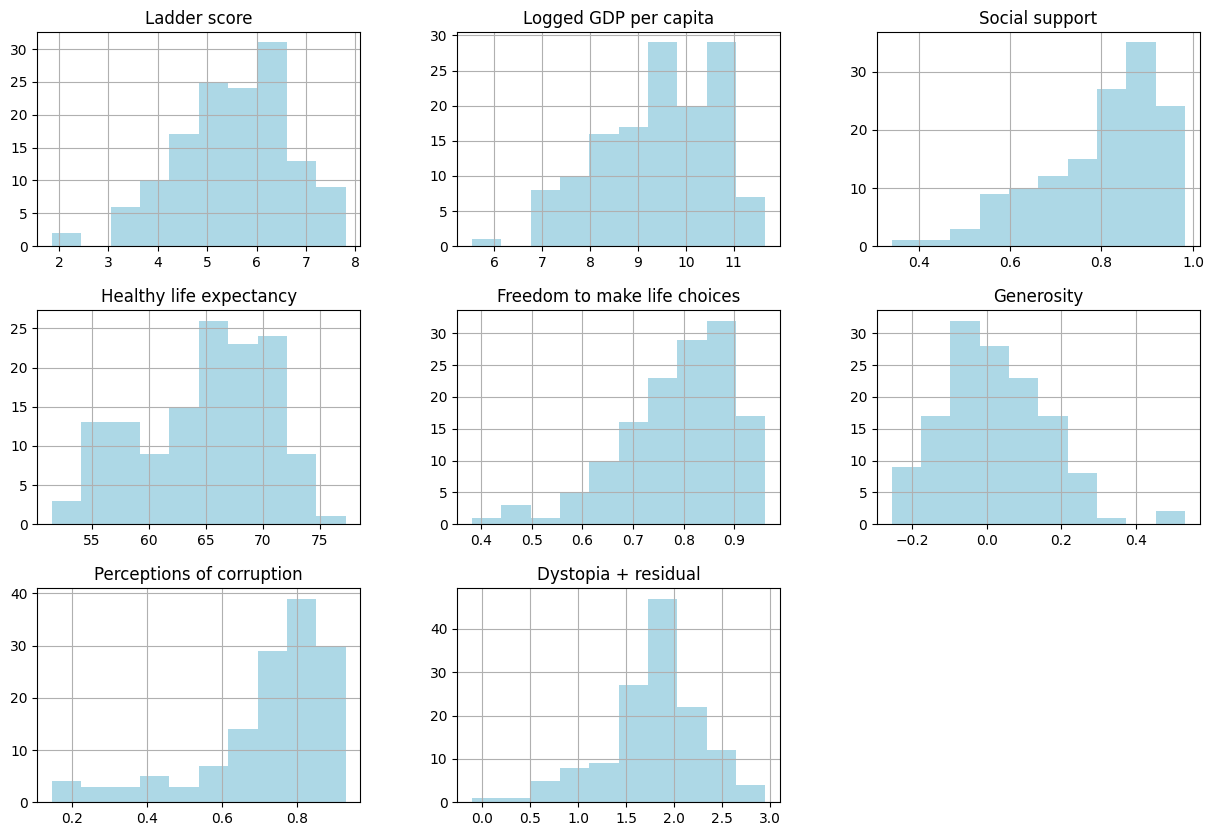

In [ ]:
df.hist(column = ['Ladder score',
                  'Logged GDP per capita',
                  'Social support',
                  'Healthy life expectancy',
                  'Freedom to make life choices',
                  'Generosity',
                  'Perceptions of corruption',
                  'Dystopia + residual'],
        figsize = (15, 10),
        color = 'lightblue')

## Inference from the histograms
A word about **dystopia residual**: this is a score of comparison to a made-up miserable place. This essentially allows all countries to remain positive against this benchmark.

The **ladder (happiness) score**, **generosity**, and **dystopia residual** are normally distributed with a familiar bell-shaped curve.
There is also evidence that a better economy, as measured by the **logged GDP per capita**, family/**social support** are left-skewed, with higher levels of each corresponding to better life satisfaction. Interestingly, a larger economy is associated with more happiness only up to a point, as it drops off sharply after reaching a peak.

The **healthy life expectancy** seems to be bimodal, with 55 and 65 years as peaks, which is reasonable considering the divide between the developed and developing world in terms of life expectancy.

## Defining Objectives

First of all, I want to see **how these various measures correlate to the overall happiness score**. A heatmap is the ideal visualization tool for this task, since it allows a birds-eye view of all metrics and their relationship to each other.

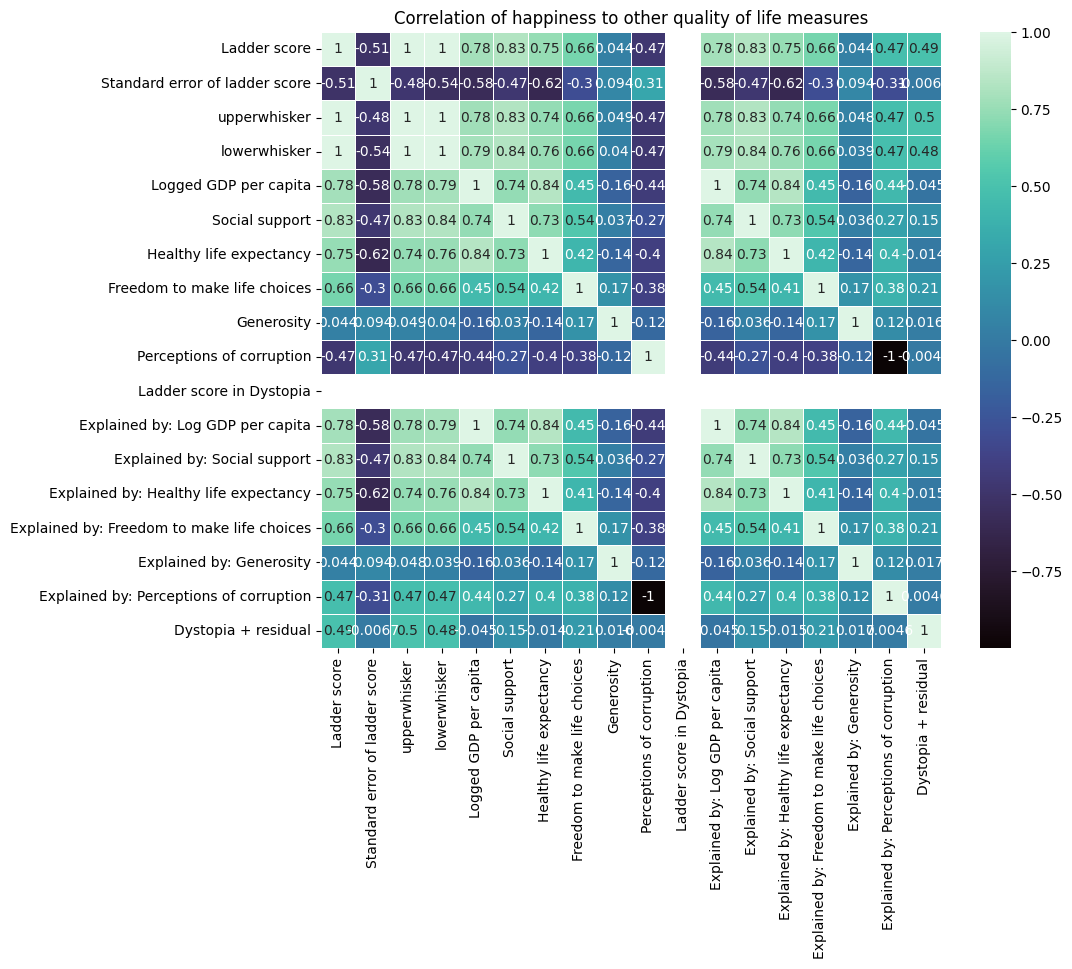

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of happiness to other quality of life measures')
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt='.2g',  linewidths=0.5, cmap = 'mako')
plt.show()

It is clear that the Happiness Score is heavily positively associated with such measures as the economy, family, health and life expectancy, and freedom. My particular point of interest here, however, lies in **the relationship between trust in fair and uncorrupt government and the overarching life satisfaction** of a country's population.

This quick statistical analysis suggests that there is a positive relationship between population happiness and trust in their government:

In [ ]:
np.corrcoef(df['Happiness Score'], df['Trust (Government Corruption)'])

array([[1.        , 0.40203225],
       [0.40203225, 1.        ]])

I also wanted to see **how different world regions compared against each other**, which led me to group the countries by region and look at their average levels of happiness.

In [ ]:
df.groupby('Region').mean().nlargest(10, columns = 'Happiness Score')

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,8.500000,7.323500,7.252500,7.394500,1.402545,1.138770,0.841080,0.574920,0.371175,0.484040,2.511015
North America,9.500000,7.254000,7.177500,7.330500,1.474055,1.071960,0.803300,0.527665,0.230985,0.429555,2.716335
Western Europe,29.190476,6.685667,6.604571,6.766762,1.417056,1.042452,0.825754,0.477587,0.232544,0.304715,2.385576
Latin America and Caribbean,48.333333,6.101750,5.976750,6.226750,0.993410,0.898432,0.612703,0.426646,0.106016,0.208428,2.856078
Eastern Asia,67.166667,5.624167,5.550167,5.698167,1.277312,0.910428,0.806680,0.387282,0.118347,0.223563,1.900682
Middle East and Northern Africa,78.105263,5.386053,5.274895,5.497211,1.139323,0.695644,0.616438,0.309769,0.161526,0.186749,2.276677
Central and Eastern Europe,78.448276,5.370690,5.283690,5.457690,1.047537,0.861855,0.631592,0.300528,0.088072,0.170898,2.270222
Southeastern Asia,80.000000,5.338889,5.249556,5.428222,0.896381,0.791756,0.561369,0.490123,0.148104,0.446150,2.004910
Southern Asia,111.714286,4.563286,4.485000,4.641571,0.660671,0.480694,0.453670,0.350026,0.104899,0.343281,2.170101


Interestingly enough, even though all the highest ranking countries are in Western Europe, as a region, it lags behind Australia + New Zealand and North America. This suggests that there Western Europe is not a homogenous place when it comes to life satisfaction, and there is some variability.
When we examine the top three world regions and their levels of trust in that their power structures are not corrupt, all three boast high levels of confidence in this respect.
Next, I want to **zoom in on Western Europe** and look at the countries just in that region, and see **how different from each other** they may be.

In [ ]:
western_europe = df[df['Region'] == 'Western Europe']
western_europe

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734
11,Austria,Western Europe,12,7.119,7.045,7.193,1.45038,1.08383,0.80565,0.54355,0.21348,0.32865,2.69343
15,Germany,Western Europe,16,6.994,6.930,7.058,1.44787,1.09774,0.81487,0.53466,0.28551,0.30452,2.50931
17,Belgium,Western Europe,18,6.929,6.861,6.997,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,2.61355


This suggests that Western European countries are not a homogenous group. Countires in this region seem to have vastly different scores when it comes both to happiness and their trust in fair and uncorrupt government.
I created a plot to visualize the difference in this parameter.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


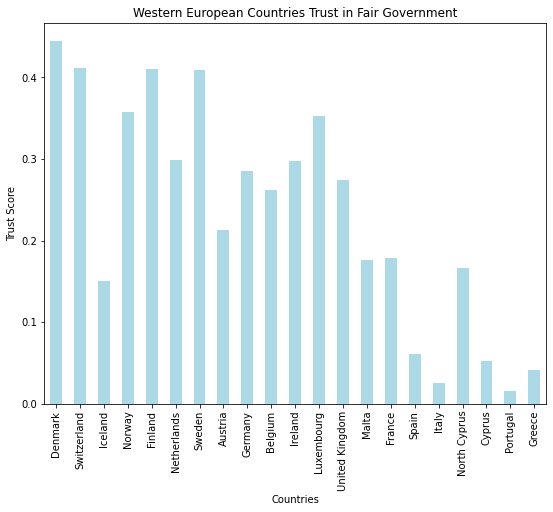

In [ ]:
western_europe['Trust (Government Corruption)'].plot.bar(figsize = (9,7), color = 'lightblue')

ax = plt.subplot()
ax.set_xticklabels(western_europe['Country'])

plt.xlabel('Countries')
plt.ylabel('Trust Score')
plt.title('Western European Countries Trust in Fair Government')

plt.show()

To further analyze this relationship between trust in the absence of corruption in the power structures and the population happiness, I used a scatterplot to visualize the concentration and the strength of this association.

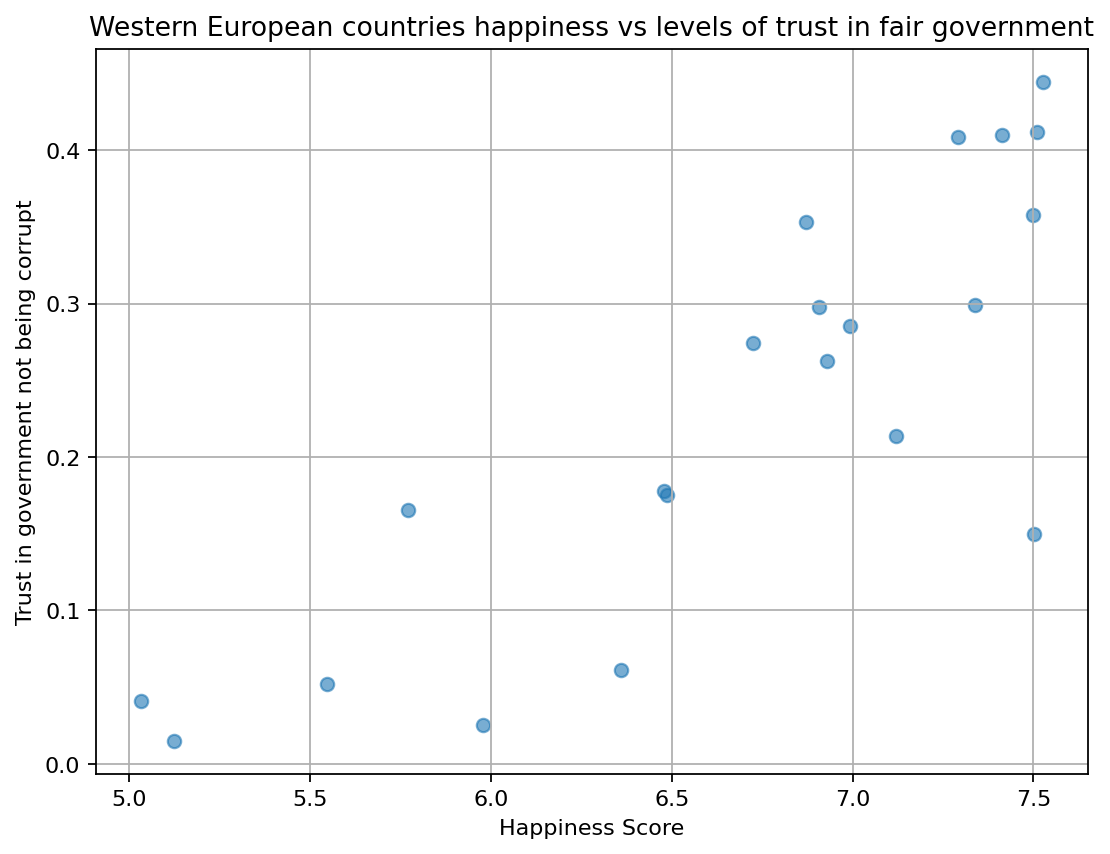

In [ ]:
x = western_europe['Happiness Score']
y = western_europe['Trust (Government Corruption)']
plt.figure(figsize = (8, 6), dpi = 80)
plt.scatter(x, y, alpha = 0.6)
plt.grid(True)
plt.xlabel('Happiness Score')
plt.ylabel('Trust in government not being corrupt')
plt.title('Western European countries happiness vs levels of trust in fair government')
%config InlineBackend.figure_format = 'retina'
plt.show()

My next step was to see how it compares to the global situation.

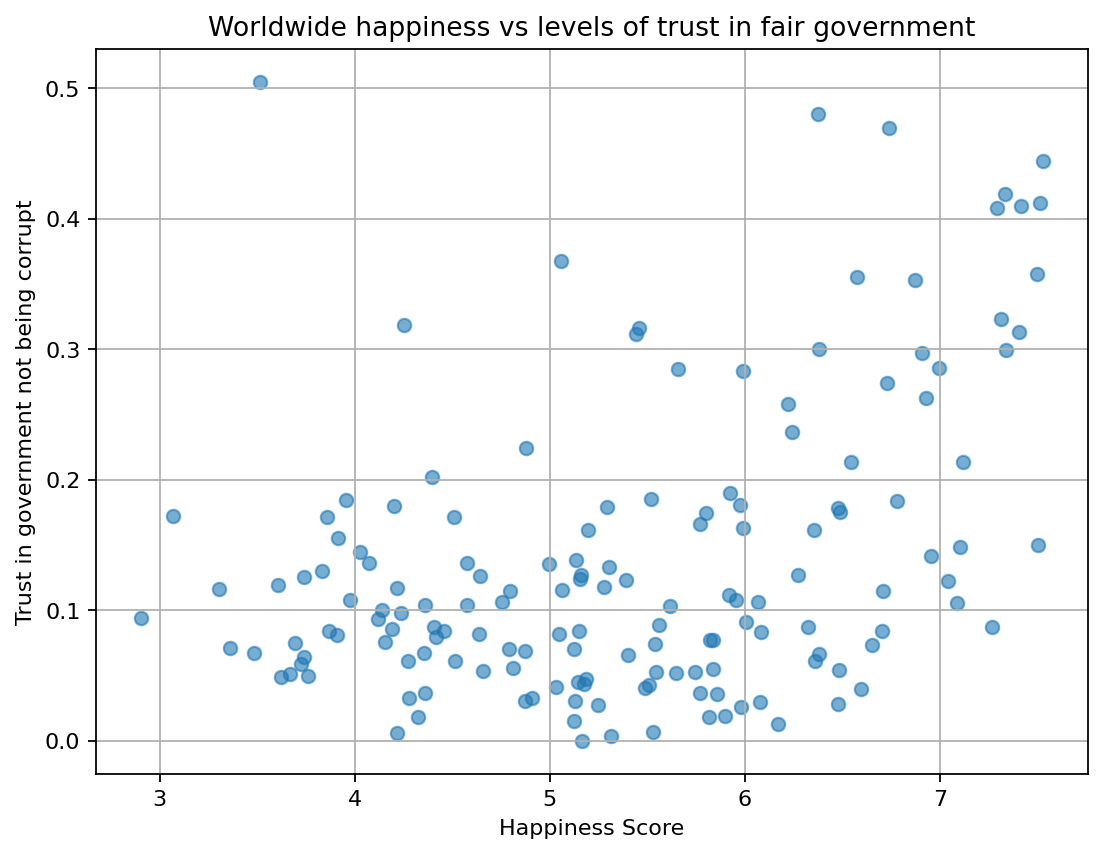

In [ ]:
x1 = df['Happiness Score']
y1 = df['Trust (Government Corruption)']
plt.figure(figsize = (8, 6), dpi = 80)
plt.scatter(x1, y1, alpha = 0.6)
plt.grid(True)
plt.xlabel('Happiness Score')
plt.ylabel('Trust in government not being corrupt')
plt.title('Worldwide happiness vs levels of trust in fair government')
%config InlineBackend.figure_format = 'retina'
plt.show()

These two scatterplots follow the same broad logic. The higher the trust in fair and uncorrupt power structures, the happiner the nation. There are a few exceptions and outliers here, but generally, this patterns holds globally as well.

Finally, I wanted to investigate how different world regions compare to each other when it comes to their levels of trust in government.

Text(0.5, 1.0, 'Trust in Fair and Uncorrupt Government by World Region')

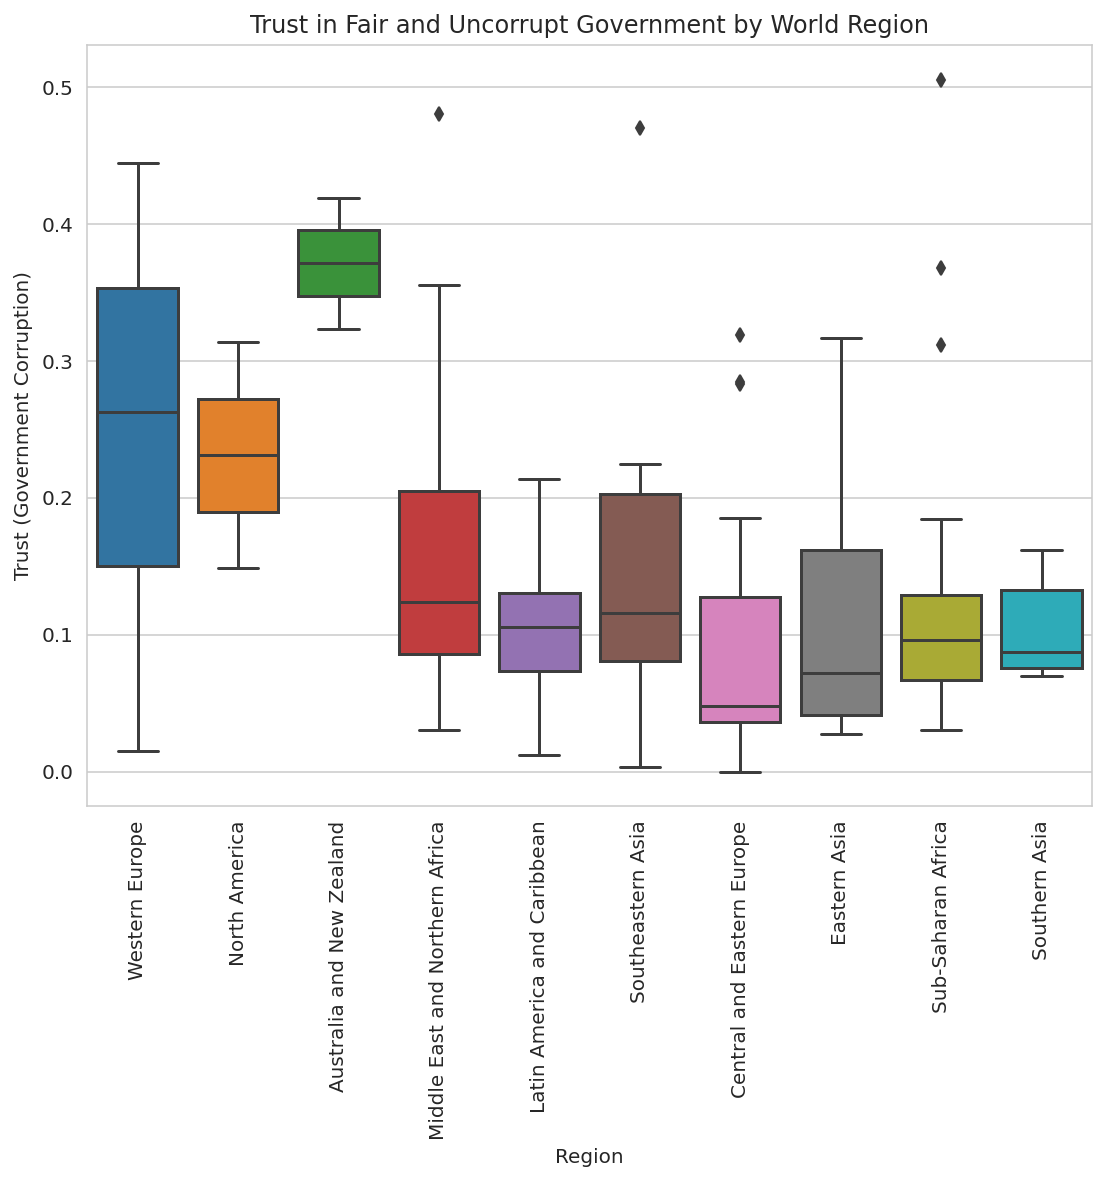

In [ ]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, figsize=(9,7))
figure = sns.boxplot(x = df['Region'], y = df['Trust (Government Corruption)'])

figure.set_xticklabels(figure.get_xticklabels(), rotation = 90)
figure.set_title('Trust in Fair and Uncorrupt Government by World Region')

Again, we can immediately see that Western Europe, North America, and Australia and New Zealand have higher levels of trust that their governments are fair and accountable to their own citizens. Notably, this visualization confirms that there is quite a lot of variability regarding faith in uncorrupt government in Western Europe, the region that was particularly interesting to me. Compared to its neighbors, such as North America and Australia and New Zealand, the spread there is considerably smaller.

We can also note some outliers with high levels of trust in the Middle East and North Africa, Southeast Asia, Central and Eastern Europe, and Sub-Saharan Africa. However, the rest of the world's regions enjoy far lower levels of this trust on the whole.

## Ethics

From an ethical point of view, the data collected is somewhat limited. The team reports that it [surveys 2000-3000 people per country](https://worldhappiness.report/faq).
This means that different nations end up with the same sample size regardless of their population size, which, in turn, means that smaller, highly developed countries are the easiest to survey and have the most accurate data to represent them.

Another potential issue is that this index informs and reinforces the perception that highly developed countries in the Global North are also the happiest or, at the very least, have high levels of life satisfaction. In reality, though, happiness and life satisfaction are quite subjective.

The third and final point I'd like to make touches upon representation. It is unlikely that any community, such as an uncontacted tribe of hunter-gatherers in the Namibian desert or the Amazonian jungle, was represented in this index, which, again, gives this report a rather Western-developed-perspective normative flavor.

Any efforts to measure such intangible and subjective notions as happiness and life satisfaction will be reductive, at least to some degree. Still, these are the caveats to keep in mind, in my opinion.